### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


#### (1) What is the independent variable? What is the dependent variable?

The independent variable is the state of congruency between the color word and text color. For example, blue written in blue ink is congruent, while red written in green ink is incongruent. The dependent variable is the time it takes for the participant to name the text color.

#### (2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The test will be whether the state of the text color and color word being congruent or incongruent has an effect on the time it takes for participants to name the text color. Since the samples are the same participants, the congruent time will essentially act as a control with each having a corresponding incongruent test pairing. Therefore, the best statistical test for this data set will be a paired t-test, because there are two sets of the same measure for the same sample of the population under different condition. The null hypothesis will be that there is no affect, or that their is no difference in the mean values between pair sets. The alternate or research hypothesis will be that there is an affect, or the means between sample pairs are different. Whether the null hypothesis is rejected will show whether there is a statistically significant difference in means, or that congruency between color word and text color affects the time for participants to name the text color. 

Null hypothesis: there is no difference between the sample means

$H_0: \mu_{diff} = 0$

Alternative hypothesis: there is a difference between sample means

$H_1: \mu_{diff} \neq 0$

The standard value of $\alpha = 0.05$ will be used to provide 95% certain.

#### (3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [34]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [35]:
# load data set
filename = 'stroopdata.csv'
stroop_df = pd.read_csv(filename)

In [36]:
# what does the data table look like?
stroop_df.head(3)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214


In [37]:
# name series and extract columns for convenience
series_list = [stroop_df[column] for column in stroop_df.columns]
columns_list = [column for column in stroop_df.columns]

In [38]:
# generate some general statistics for sample pair sets
print pd.concat([series.describe() for series in series_list], axis=1)

       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000


The trends based on the summary statistics seem to indicate their might be a difference between series. The number of data pairs is the same ($n_c = n_i = 24$), which is expected. The means between sets seem different ($\bar{x_c} = 14.05, \bar{x_i} = 22.02$). The standard deviations are of the same order of magnitude ($s_c = 3.56$, $s_i = 4.80$,). The interquartile ranges don't overlap ($IQR_c\in[11.90, 16.20], IQR_i\in[18.72, 24.05]$), but the min/max ranges do ($x_c\in[8.63, 22.33], x_i\in[15.69, 35.26]$).

#### (4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

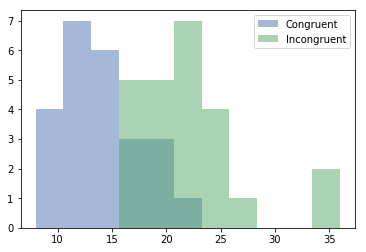

In [39]:
# histograms of both series
bins = np.linspace(8, 36, 12)
for column in stroop_df.columns:
    plt.hist(stroop_df[column], bins=bins, alpha=0.5, label=column)
plt.legend(loc='upper right')
plt.show()

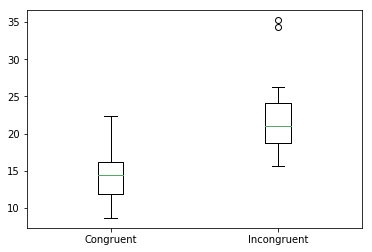

In [40]:
# box and whisker plots for both series
plt.boxplot([stroop_df[column] for column in stroop_df.columns],
            labels=[column for column in stroop_df.columns])
plt.show()

The visualizations display the same as the summary statistics. The sample means seem to be different and most to the points bewteen samples are seperated, but it will take a statistical test to see if there is enough difference between the congruent and incongruent data to say there is a difference.

#### (5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [41]:
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(*series_list)
print "t-statistic:", t_stat
print "p-value:", p_value

t-statistic: -8.020706944109957
p-value: 4.103000585711178e-08


The p-value is very small (p = 4.10e-08), which is much less than the $\alpha = 0.05$ needed for 95% confidence, indicating that the result is statistically significant. The t-statistic is negative (t-stat = -8.02), which indicates that the mean time for participants to name the text color for congruent text color and color words is less than the mean time for participants to name incongruent text color and color word.

#### (6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The effect is due to interference between cognitive tasks. There have been many studies that show similar results using different tasks. For example, Hentschel added words to line drawings and had participants name the picture.$^{1}$

$^{1}$ MacLeod, Colin M. "Haifa Century of Research on the Stroop Effect: An Integrative Review" <i>Psychological Bulletin</i>. vol. 109, no. 2, 1991, pp. 163-203.